## Analysis the result of Donor-Acceptor molecules based on structural similarity clusters

Import modules

In [3]:
import os
import glob
import pandas as pd
import numpy as np
from rdkit.Chem import AllChem
from rdkit.Chem.AtomPairs import Pairs
from rdkit.Chem import rdMolDescriptors
from rdkit import Chem, DataStructs
import matplotlib.pyplot as plot
from mlxtend.plotting import category_scatter
from sklearn.metrics import mean_squared_error

In [20]:
import sqlite3
conn = sqlite3.connect('solar.db')
c = conn.cursor()

In [21]:
#select gaps and modularity class
c.execute("""SELECT number_key_values.id, number_key_values.value, DA_modu_no_header.modularity_class
             FROM number_key_values JOIN DA_modu_no_header
             ON number_key_values.id=DA_modu_no_header.id
             WHERE number_key_values.key='dip' """)

In [6]:
result_dip_all = c.fetchall()

In [26]:
#select gaps and modularity class
c.execute("""SELECT number_key_values.id, number_key_values.value, DA_modu_no_header.modularity_class
             FROM number_key_values JOIN DA_modu_no_header
             ON number_key_values.id=DA_modu_no_header.id
             WHERE number_key_values.key='KS_gap' """)

In [27]:
result_gap_all = c.fetchall()

In [10]:
ids_all = [item[0] for item in result_gap_all]
gaps_all = [item[1] for item in result_gap_all]
dips_all = [item[1] for item in result_dip_all]
classes_all = [item[2] for item in result_dip_all]

In [11]:
df_all = pd.DataFrame()
df_all['id'] = pd.Series(ids_all)
df_all['gaps'] = pd.Series(gaps_all)
df_all['dips'] = pd.Series(dips_all)
df_all['class'] = pd.Series(classes_all)

In [144]:
plot.rcParams['figure.figsize'] = [20, 8]

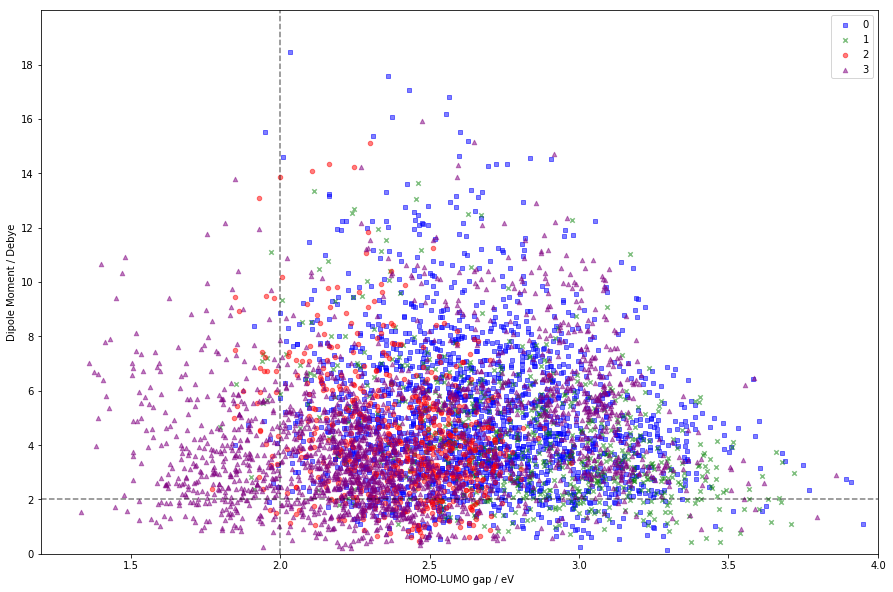

In [13]:
fig = category_scatter(x='gaps', y='dips', label_col='class',data=df_all, alpha=0.5)
plot.xlabel('HOMO-LUMO gap / eV')
plot.ylabel('Dipole Moment / Debye')
plot.yticks(np.arange(0, 20, 2.0))
plot.ylim(0, 20)
plot.xlim(1.2, 4)
plot.hlines(2, 1.2, 4, linestyles='dashed', alpha=0.5)
plot.vlines(2, 0, 20, linestyles='dashed', alpha=0.5)
plot.savefig('overall_cluster.png', dpi=300)

In [244]:
# Save edge table for clustering inside class3
clusters = pd.read_csv('DA_modu.csv')
weights = pd.read_csv('DA_for_cluster.csv')
class3 = clusters.loc[clusters['modularity_class'] == 3]
weights_class3 = weights.loc[weights['source'].isin(class3['Id'].values) & weights['target'].isin(class3['Id'].values)]
weights_class3.to_csv('weights_DA_modu_class3.csv', index=False)

In [25]:
#select gaps and modularity class in the sub cluster of class 3
c.execute("""SELECT number_key_values.id, number_key_values.value, DA_modu_class3_sub_class_no_header.sub_class_under3
             FROM number_key_values JOIN DA_modu_class3_sub_class_no_header
             ON number_key_values.id=DA_modu_class3_sub_class_no_header.id
             WHERE number_key_values.key='KS_gap' """)

In [21]:
gap_result = c.fetchall()

In [17]:
#select gaps and modularity class
c.execute("""SELECT number_key_values.id, number_key_values.value, DA_modu_class3_sub_class_no_header.sub_class_under3
             FROM number_key_values JOIN DA_modu_class3_sub_class_no_header
             ON number_key_values.id=DA_modu_class3_sub_class_no_header.id
             WHERE number_key_values.key='dip' """)

In [18]:
dip_result = c.fetchall()

In [23]:
# Build dataframe for sub clusters under class 3
ids = [item[0] for item in gap_result]
gaps_class1 = [item[1] for item in gap_result]
dips = [item[1] for item in dip_result]
classes = [item[2] for item in dip_result]
df = pd.DataFrame()
df['id'] = pd.Series(ids)
df['gaps'] = pd.Series(gaps_class1)
df['dips'] = pd.Series(dips)
df['class'] = pd.Series(classes)

In [ ]:
plot.subplot(221)
plot.hist(dips_all_class[0], bins=15, edgecolor='black')
plot.xlabel('Dipole moment')
plot.ylabel('Frequency')
plot.subplot(222)
plot.hist(dips_all_class[1], bins=15, edgecolor='black')
plot.xlabel('Dipole moment')
plot.ylabel('Frequency')
plot.subplot(223)
plot.hist(dips_all_class[2], bins=15, edgecolor='black')
plot.xlabel('Dipole moment')
plot.ylabel('Frequency')
plot.subplot(224)
plot.hist(dips_all_class[3], bins=15, edgecolor='black')
plot.xlabel('Dipole moment')
plot.ylabel('Frequency')

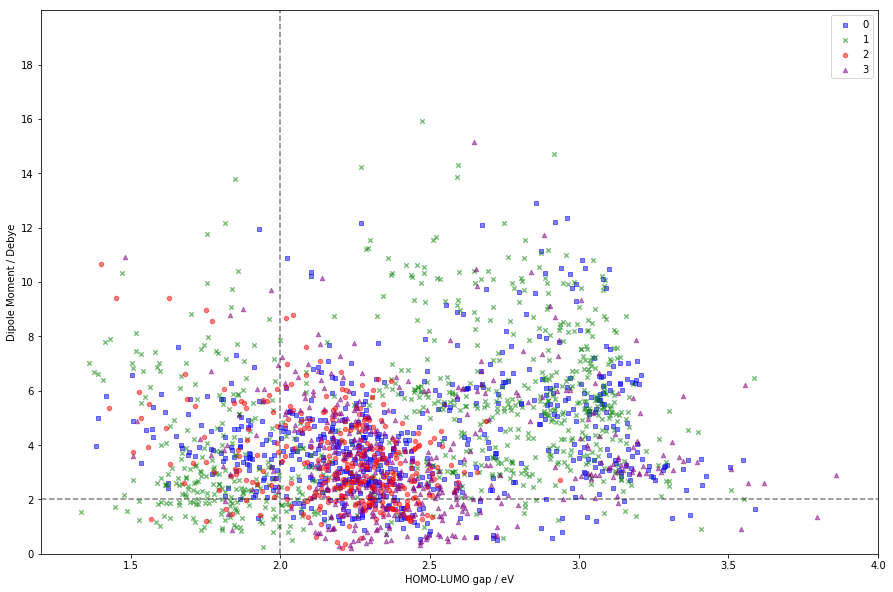

In [24]:
fig = category_scatter(x='gaps', y='dips', label_col='class',data=df, alpha=0.5)
plot.xlabel('HOMO-LUMO gap / eV')
plot.ylabel('Dipole Moment / Debye')
plot.yticks(np.arange(0, 20, 2.0))
plot.ylim(0, 20)
plot.xlim(1.2, 4)
plot.hlines(2, 1.2, 4, linestyles='dashed', alpha=0.5)
plot.vlines(2, 0, 20, linestyles='dashed', alpha=0.5)
#plot.savefig('sub_cluster_in_class3.png', dpi=300)

Text(0,0.5,'Dipole_test_pred')

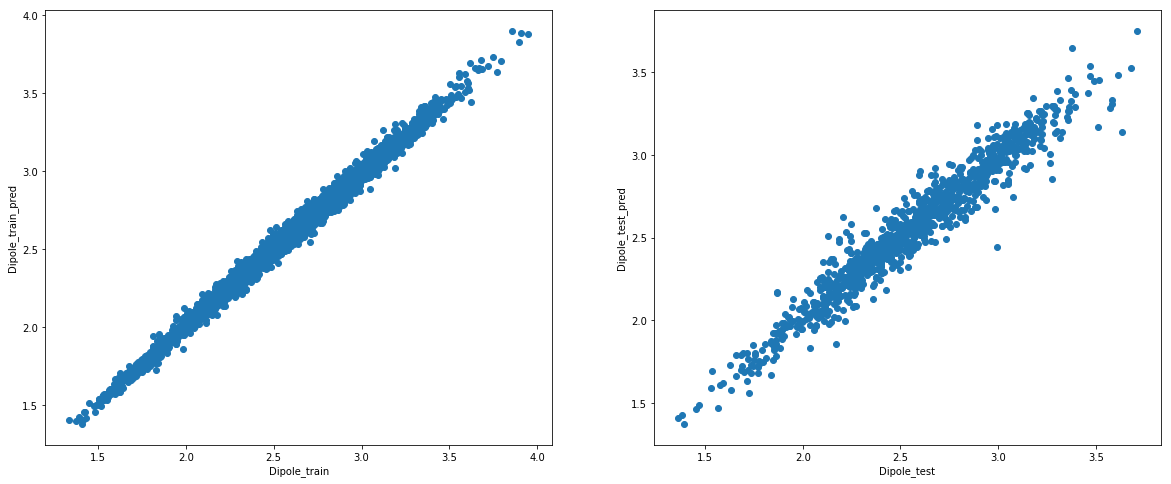

In [145]:
dip_df = pd.read_csv('gbdt_dip.csv')
train_df = dip_df.loc[dip_df['label'] == 'train']
train_gdbt = train_df['dip_gdbt']
train_exp = train_df['dip_exp']
test_df = dip_df.loc[dip_df['label'] == 'test']
test_gdbt = test_df['dip_gdbt']
test_exp = test_df['dip_exp']
plot.subplot(121)
plot.scatter(train_exp, train_gdbt)
plot.xlabel('Dipole_train')
plot.ylabel('Dipole_train_pred')
plot.subplot(122)
plot.scatter(test_exp, test_gdbt)
plot.xlabel('Dipole_test')
plot.ylabel('Dipole_test_pred')

In [147]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_gdbt, test_exp)

0.009635184476815115

In [46]:
dips_all_class = []
for i in range(4):
    dips_all_class.extend([df_all.loc[df_all['class'] == i, 'dips']])
gaps_all_class = []
for i in range(4):
    gaps_all_class.extend([df_all.loc[df_all['class'] == i, 'gaps']])

In [139]:
len(df_all)

5356

Text(0,0.5,'Frequency')

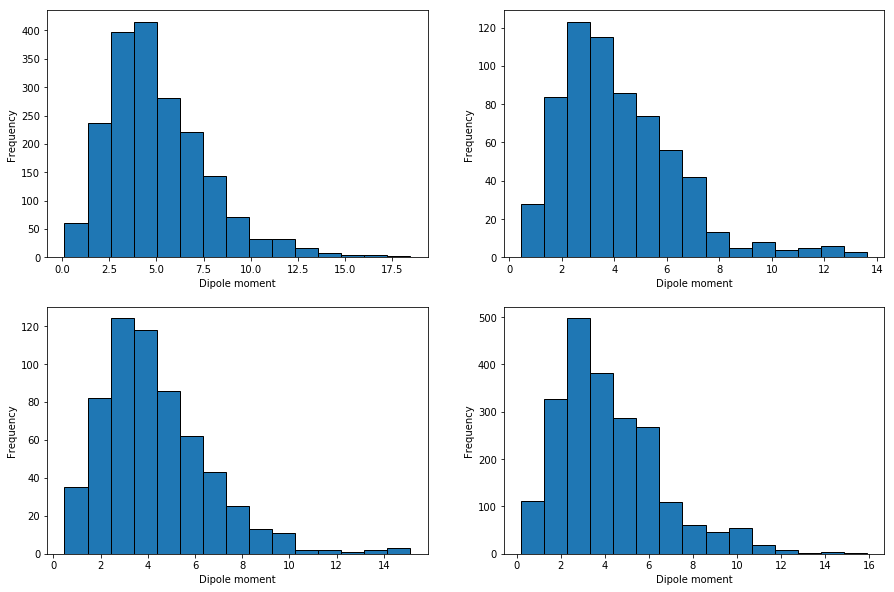

In [52]:
plot.subplot(221)
plot.hist(dips_all_class[0], bins=15, edgecolor='black')
plot.xlabel('Dipole moment')
plot.ylabel('Frequency')
plot.subplot(222)
plot.hist(dips_all_class[1], bins=15, edgecolor='black')
plot.xlabel('Dipole moment')
plot.ylabel('Frequency')
plot.subplot(223)
plot.hist(dips_all_class[2], bins=15, edgecolor='black')
plot.xlabel('Dipole moment')
plot.ylabel('Frequency')
plot.subplot(224)
plot.hist(dips_all_class[3], bins=15, edgecolor='black')
plot.xlabel('Dipole moment')
plot.ylabel('Frequency')

In [56]:
for i in range(4):
    print (dips_all_class[i].describe().apply(lambda x: format(x, '.2f')))

count    1923.00
mean        5.06
std         2.65
min         0.12
25%         3.19
50%         4.53
75%         6.46
max        18.45
Name: dips, dtype: object
count    652.00
mean       4.22
std        2.27
min        0.45
25%        2.61
50%        3.70
75%        5.48
max       13.63
Name: dips, dtype: object
count    609.00
mean       4.32
std        2.28
min        0.47
25%        2.80
50%        3.94
75%        5.45
max       15.12
Name: dips, dtype: object
count    2172.00
mean        4.21
std         2.37
min         0.20
25%         2.53
50%         3.71
75%         5.53
max        15.91
Name: dips, dtype: object


In [105]:
len(df_all.loc[(df_all['dips'] <=2) & (df_all['gaps'] <= 2.5) & (df_all['class'] == 0)])

45

Text(0,0.5,'Frequency')

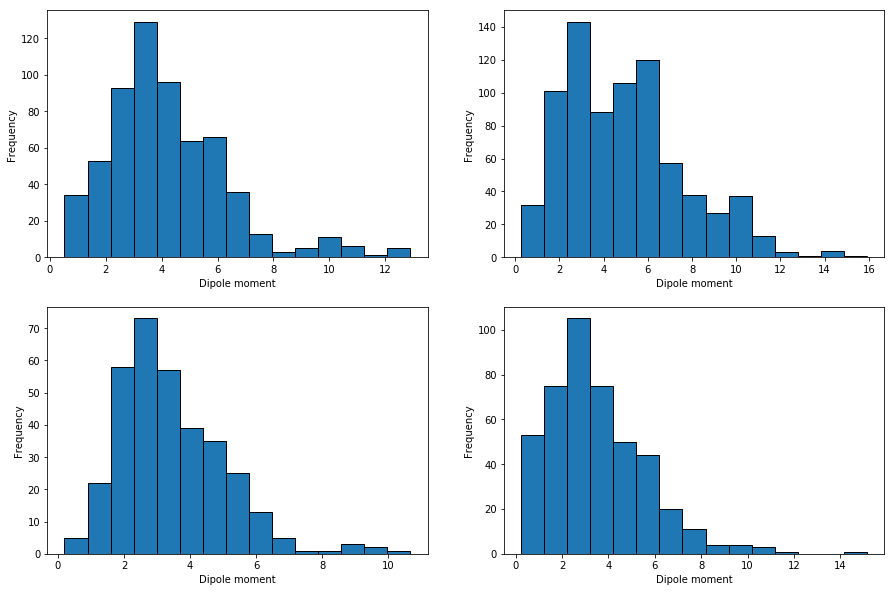

In [138]:
dips_class3 = []
for i in range(4):
    dips_class3.extend([df.loc[df['class'] == i, 'dips']])
gaps_class3 = []
for i in range(4):
    gaps_class3.extend([df.loc[df['class'] == i, 'gaps']])
plot.subplot(221)
plot.hist(dips_class3[0], bins=15, edgecolor='black')
plot.xlabel('Dipole moment')
plot.ylabel('Frequency')
plot.subplot(222)
plot.hist(dips_class3[1], bins=15, edgecolor='black')
plot.xlabel('Dipole moment')
plot.ylabel('Frequency')
plot.subplot(223)
plot.hist(dips_class3[2], bins=15, edgecolor='black')
plot.xlabel('Dipole moment')
plot.ylabel('Frequency')
plot.subplot(224)
plot.hist(dips_class3[3], bins=15, edgecolor='black')
plot.xlabel('Dipole moment')
plot.ylabel('Frequency')

In [140]:
for i in range(4):
    print (dips_class3[i].describe().apply(lambda x: format(x, '.2f')))

count    615.00
mean       4.20
std        2.12
min        0.52
25%        2.78
50%        3.81
75%        5.29
max       12.90
Name: dips, dtype: object
count    771.00
mean       4.96
std        2.70
min        0.26
25%        2.83
50%        4.79
75%        6.41
max       15.91
Name: dips, dtype: object
count    340.00
mean       3.43
std        1.63
min        0.20
25%        2.29
50%        3.16
75%        4.43
max       10.66
Name: dips, dtype: object
count    446.00
mean       3.51
std        2.14
min        0.23
25%        2.01
50%        3.12
75%        4.76
max       15.15
Name: dips, dtype: object


## Analysing the molecules generated using RNN + transfer learning

### Number and ratio of valid/unique/promising molecules with increased sample size 

In [37]:
valid_nums = []
for i in [1024, 2048, 4096, 8192, 16384, 32768]:
    valid_df = pd.read_csv('./sampled_da_info/sampled_da'+str(i)+'_smi.csv', header=None)
    valid_nums.append(len(valid_df))

In [38]:
unique_nums, promising_nums = [], []
unique_sampled = pd.read_csv('unique_sampled_smiles.csv')
unique_nums = unique_sampled['Group'].value_counts().tolist()[::-1]
promising = unique_sampled[(unique_sampled['Gap'] <= 2) & (unique_sampled['Dip'] <= 2)]
len(promising)

254

In [46]:
promising.head()

,SMILES,Group,Gap,Dip
57,Cc1c(-c2ncc(-c3cccs3)c3nsnc23)sc(-c2c(C)c3cc4c...,1024,1.802994,1.051718
107,CSc1cn(C)c(-c2cnc(-c3c(SC)c(SC)c(-c4c(C)c5c(SC...,1024,1.840787,1.404600
117,CSc1cn(C)c2cc3c(SC)c(-c4c(C)c(C)c(-c5ncc(-c6c(...,1024,1.934539,1.926191
147,Cn1cccc1-c1ccc(-c2ccc(-c3ncc(-c4ccco4)c4nonc34...,1024,1.948965,1.528294
162,COc1cc(-c2ccc(-c3nccc4nonc34)n2C)n(C)c1,1024,1.922643,1.509082
